In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/sample_data/Luxury watch.csv')

# Data cleaning
# Clean 'Price (USD)'
df['Price (USD)'] = df['Price (USD)'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean 'Water Resistance'
df['Water Resistance'] = df['Water Resistance'].str.extract('(\d+)', expand=False).astype(int)

# Clean 'Power Reserve'
df['Power Reserve'] = df['Power Reserve'].str.extract('(\d+)', expand=False).astype(float)

# Drop rows with NaN values in 'Price (USD)' or 'Power Reserve' as they will not be useful for the analysis
df_cleaned = df.dropna(subset=['Price (USD)', 'Power Reserve'])

# Data analysis
# 1. Average power reserve per brand
avg_power_reserve = df_cleaned.groupby('Brand')['Power Reserve'].mean().sort_values(ascending=False)
print("Average Power Reserve per Brand (in hours):\n", avg_power_reserve)

# 2. Most features per watch
# Handle NaN values in 'Complications' by filling with empty strings
df['Complications'] = df['Complications'].fillna('')
df['Complication_Count'] = df['Complications'].apply(lambda x: len(x.split(',')) if x != 'None' and x != 'N/A' else 0)
max_complication_count = df['Complication_Count'].max()
watch_with_most_features = df[df['Complication_Count'] == max_complication_count]
print("\nMost features on a single watch:", max_complication_count)
print("Watch with the most features:\n", watch_with_most_features[['Brand', 'Model', 'Complications']])

# 3. Correlation between water resistance and price
correlation = df[['Water Resistance', 'Price (USD)']].corr().iloc[0, 1]
print(f"\nCorrelation between Water Resistance and Price: {correlation:.2f}")

# 4. More data analysis points
# The most expensive brand on average
avg_price_per_brand = df.groupby('Brand')['Price (USD)'].mean().sort_values(ascending=False)
print("\nAverage Price per Brand (USD):\n", avg_price_per_brand)

# The most common case material
most_common_case_material = df['Case Material'].mode()[0]
print("\nMost Common Case Material:", most_common_case_material)

# The distribution of different movement types
movement_type_distribution = df['Movement Type'].value_counts()
print("\nDistribution of Movement Types:\n", movement_type_distribution)

# Most common complication
# Handle NaN values in 'Complications' again for this analysis
most_common_complication_series = df['Complications'].str.split(', ').explode().str.strip()
most_common_complication_series = most_common_complication_series[(most_common_complication_series != 'None') & (most_common_complication_series != 'N/A') & (most_common_complication_series != '')]
most_common_complication = most_common_complication_series.mode()[0]
print("\nMost Common Complication:", most_common_complication)

# Most common crystal material
most_common_crystal_material = df['Crystal Material'].mode()[0]
print("\nMost Common Crystal Material:", most_common_crystal_material)




#1. Average case diameter per brand
# This helps understand which brands generally produce larger or smaller watches.
avg_diameter_per_brand = df.groupby('Brand')['Case Diameter (mm)'].mean().sort_values(ascending=False)
print("Average Case Diameter per Brand (in mm):\n", avg_diameter_per_brand)

# 2. Average price per case material
# This shows if certain materials are associated with higher average prices.
avg_price_by_material = df.groupby('Case Material')['Price (USD)'].mean().sort_values(ascending=False)
print("\nAverage Price per Case Material (USD):\n", avg_price_by_material)

# 3. Most expensive watch in the dataset
# Find the watch with the single highest price.
most_expensive_watch = df.loc[df['Price (USD)'].idxmax()]
print(f"\nMost Expensive Watch:")
print(f"  Brand: {most_expensive_watch['Brand']}")
print(f"  Model: {most_expensive_watch['Model']}")
print(f"  Price: ${most_expensive_watch['Price (USD)']:.2f}")

# 4. Distribution of watches by water resistance level
# This groups watches into common water resistance categories.
water_resistance_distribution = df['Water Resistance'].value_counts().sort_index()
print("\nDistribution of Water Resistance Levels (meters):\n", water_resistance_distribution)

# 5. Average price for each movement type
# Compares the average cost of different types of watch movements (e.g., Automatic vs. Quartz).
avg_price_by_movement = df.groupby('Movement Type')['Price (USD)'].mean().sort_values(ascending=False)
print("\nAverage Price per Movement Type (USD):\n", avg_price_by_movement)

# 6. Correlation between case diameter and price
# Checks for a relationship between the size of a watch and its price.
correlation_diameter_price = df[['Case Diameter (mm)', 'Price (USD)']].corr().iloc[0, 1]
print(f"\nCorrelation between Case Diameter and Price: {correlation_diameter_price:.2f}")


Average Power Reserve per Brand (in hours):
 Brand
Citizen                240.000000
Blancpain              120.000000
Baume & Mercier        120.000000
Hamilton                80.000000
Tudor                   70.000000
Jaquet Droz             68.000000
Rolex                   67.777778
Panerai                 66.000000
Jaeger-LeCoultre        61.500000
Hublot                  60.461538
Ulysse Nardin           60.000000
Longines                59.333333
Audemars Piguet         59.210526
A. Lange & Söhne        58.500000
Bulgari                 56.666667
IWC                     55.641026
Vacheron Constantin     52.600000
Omega                   51.739130
Breguet                 51.423077
Girard-Perregaux        51.200000
Zenith                  50.000000
Seiko                   48.200000
Breitling               46.500000
Patek Philippe          46.363636
A. Lange & Sohne        45.000000
Piaget                  44.500000
Chopard                 44.000000
Montblanc               42.0000

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2621066630.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Water Resistance'] = df['Water Resistance'].str.extract('(\d+)', expand=False).astype(int)
/tmp/ipython-input-2621066630.py:15: SyntaxWarning: invalid escape sequence '\d'
  df['Power Reserve'] = df['Power Reserve'].str.extract('(\d+)', expand=False).astype(float)


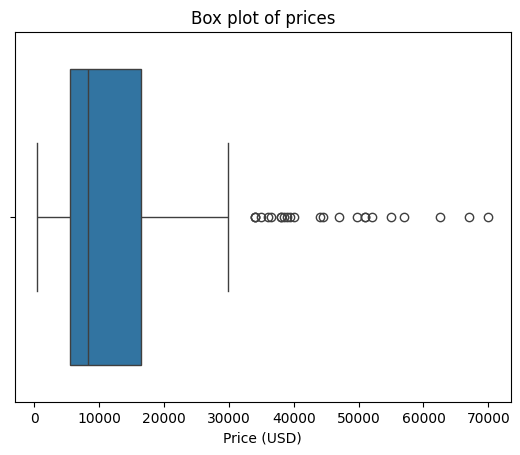

In [ ]:
#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
#1.#Outliers Detection (Box plot)
#prices outliers
sns.boxplot(x= df['Price (USD)'])
plt.title("Box plot of prices")
plt.show()





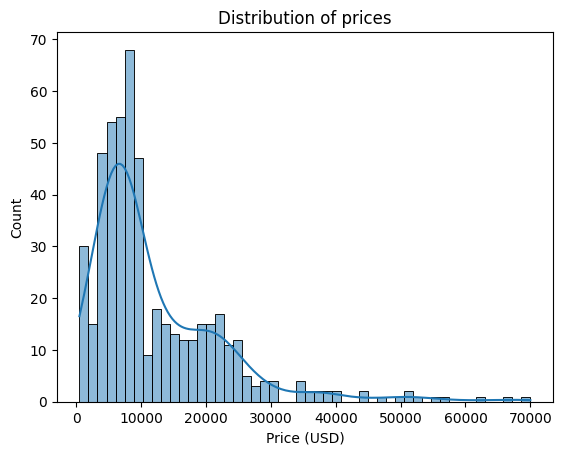

In [ ]:
##2- Histogram of prices
#check how prices are distributed(normal, skewed,..)
sns.histplot(df['Price (USD)'], bins= 50, kde= True)
plt.title("Distribution of prices")
plt.show()


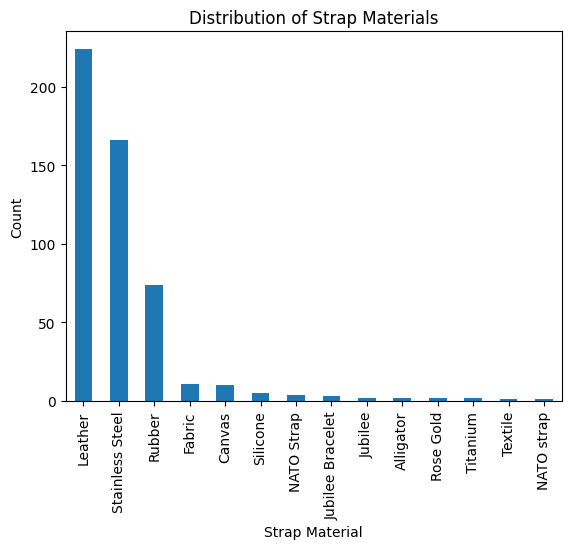

In [ ]:
df['Strap Material'].value_counts().plot(kind='bar')
plt.title('Distribution of Strap Materials')
plt.xlabel('Strap Material')
plt.ylabel('Count')
plt.show()

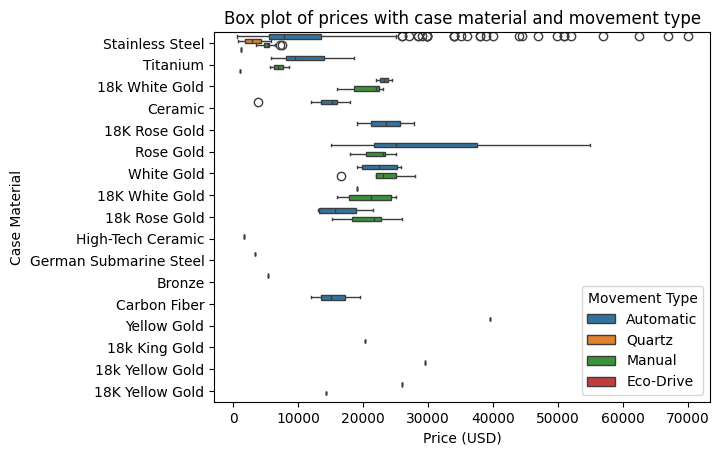

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
sns.boxplot(data=df , x= df['Price (USD)'] ,y=df['Case Material'], hue=df['Movement Type'])
plt.title("Box plot of prices with case material and movement type")
plt.show()
plt.figure(figsize=(20, 10))


<Axes: xlabel='Price (USD)', ylabel='Case Diameter (mm)'>

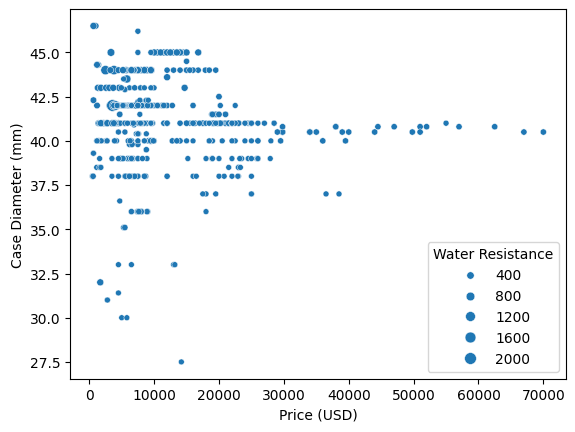

In [ ]:
sns.scatterplot(data= df, x= 'Price (USD)', y='Case Diameter (mm)', size= 'Water Resistance')

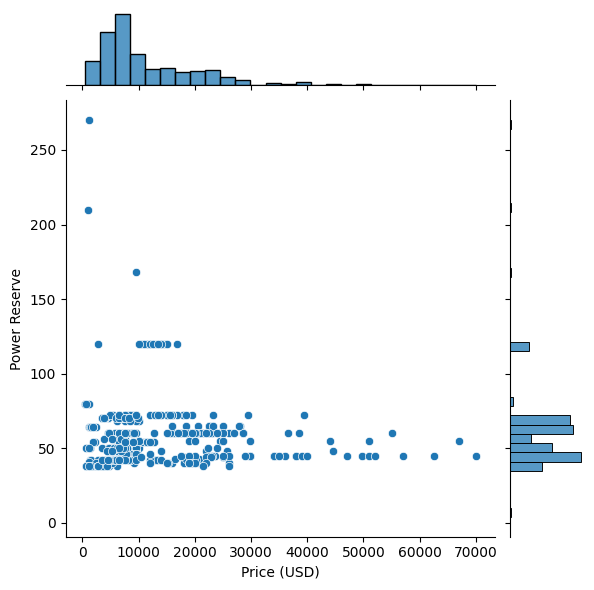

In [ ]:
sns.jointplot(data= df, x= 'Price (USD)', y='Power Reserve')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    int64  
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power Reserve        493 non-null    float64
 13  Price (USD)          506 non-null    float64
 14  Complication_Count   507 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memor

<Axes: xlabel='Price (USD)'>

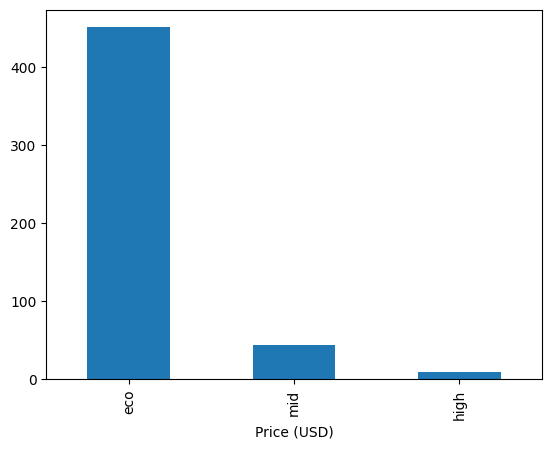

In [ ]:
x= np.linspace(df['Price (USD)'].min(), df['Price (USD)'].max(), 4)
cluster= pd.cut(df['Price (USD)'], x, labels= ['eco', 'mid', 'high'])
cluster.value_counts().plot(kind= 'bar')

<Axes: xlabel='Movement Type', ylabel='Price (USD)'>

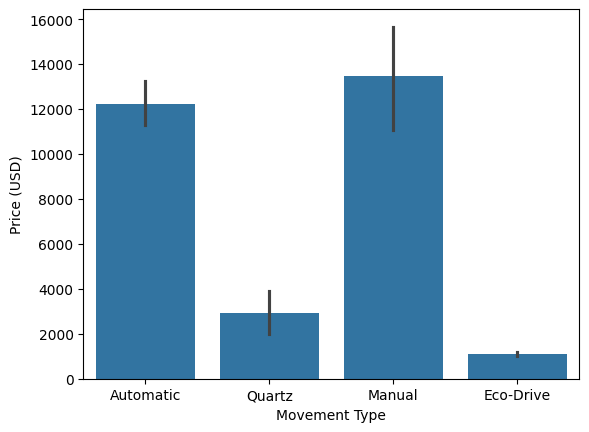

In [ ]:
sns.barplot(data= df, x= 'Movement Type', y= 'Price (USD)')